In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 用于回归的线性模型


w[0]: 0.393906  b: -0.031804


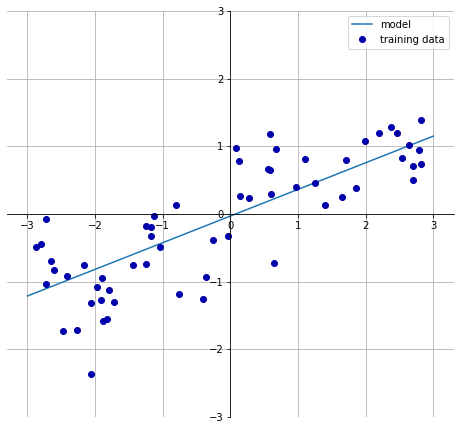

In [34]:
mglearn.plots.plot_linear_regression_wave()

对单一特征的预测结果是一条直线，两个特征是一个平面···

有许多不同的线性回归模型，区别在于如何从训练数据中学习参数w和b，以及如何控制模型复杂度。

## 最常见的线性回归模型——线性回归（最小二乘法）

线性回归寻找权值w和偏差b，使得对训练集的预测值与真实的回归目标值y之间的均方误差（预测值与真实值之差的平方和除以样本数）最小

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42) 
#这里的random_state就是为了保证程序每次运行都分割一样的训练集和测试集。

lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_:{}".format(lr.coef_))    #是一个numpy数组，每个元素对应一个输入特征；此时wave数据集中仅用一个输入特征
print("lr.intercept_:{}".format(lr.intercept_))   #是一个浮点数

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [36]:
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.67
Test set score:0.66


#### 训练集和测试集的分数相似，存在欠拟合；当有大量特征的数据集，线性模型会变得强大，存在过拟合

### 存在过拟合的波士顿房价数据集，506个样本，105个特征，故测试集和训练集的分数相差很大

In [37]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.95
Test set score:0.61


## 岭回归——可以控制模型复杂度， 添加显式约束——正则化，避免过拟合，（L2正则化）
### 岭回归在linear_model.Ridge中实现

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)

print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))

Training set score:0.89
Test set score:0.75


### 因为我们更关心泛化性能，所以Ridge比LinearRegression模型好，

### Ridge模型可以通过调整alpha参数来指定模型简单性和训练集性能对模型的重要程度

## 增大alpha会使系数W更加趋向0，从而降低训练集性能，但可能得到更好的泛化性能

In [39]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Trainning set score:{:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test,y_test)))

Trainning set score:0.79
Test set score:0.64


In [40]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test,y_test)))


Training set score:0.93
Test set score:0.77


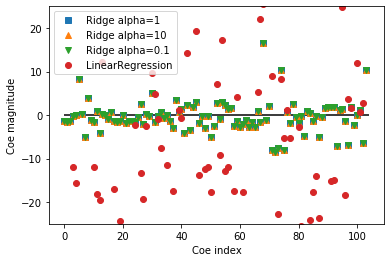

In [42]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coe index")
plt.ylabel("Coe magnitude")

plt.hlines(0,0,len(lr.coef_))#绘制水平线，vlines绘制垂直线
plt.ylim(-25,25)
plt.legend()

### 线性回归没有正则化进行约束系数

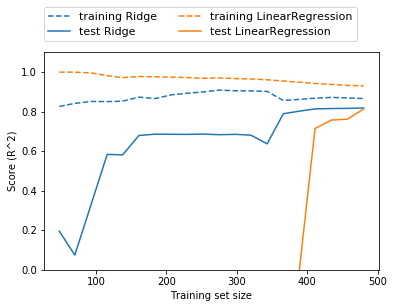

In [43]:
mglearn.plots.plot_ridge_n_samples()